In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Colormap for time
import numpy as np
from datetime import datetime
import os


#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Thermal_Soft_Robotics_git/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot


In [3]:
#Location = r"C:\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\data_analysis"
#Location = r"C:\\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\GitHub\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Membrane_valve_leak_test"
Location = r"\\sun\overvelde\group-folder\PROJECTS\Thermal_soft_robotics_Olivier\Thermal_Soft_Robotics_git\Thermal_actuation\Experimental\Fluidic\Hysteric_valve_leak_test"
Foldernames = ["\\Data"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 3
Loading... Folder 1 of 1, Sample 2 of 3
Loading... Folder 1 of 1, Sample 3 of 3


In [12]:
data[0][1]

,presFesto-1,AWM10-13,MPX100-11,Time
0,-0.000502,0.000533,12.668312,0.001
1,-0.000299,0.000363,16.827920,0.002
2,-0.000147,0.000237,19.130119,0.003
3,-0.000041,0.000150,19.859728,0.004
4,0.000027,0.000097,19.301569,0.005
...,...,...,...,...
195195,0.000440,0.008402,1.551257,195.196
195196,0.000401,0.008855,-3.311361,195.197
195197,0.000334,0.009467,-9.360520,195.198
195198,0.000233,0.010255,-16.733365,195.199


Text(0.5, 0, 'Time [s]')

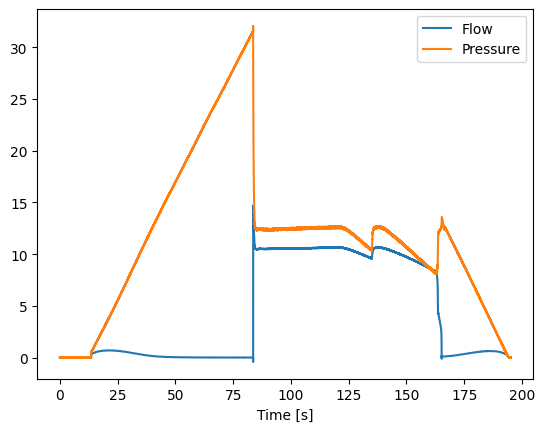

In [4]:
flow = data[0][1]['AWM10-13'].values #SLPM
P = data[0][1]['MPX100-11'].values # Pa 
time = data[0][1]['Time']

plt.plot(time,flow, label = 'Flow')
plt.plot(time,P/1000, label = "Pressure")
plt.legend()
plt.xlabel('Time [s]')

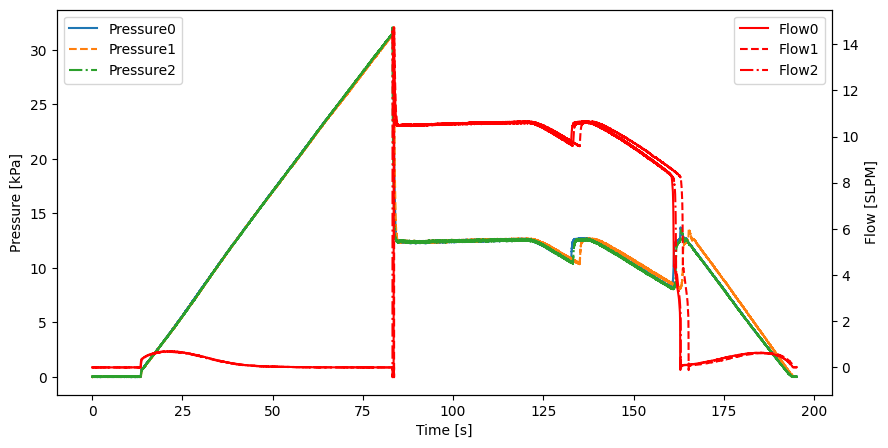

In [10]:
plt.figure(figsize=[10, 5]) # Optional, set the size of the plot
linetypes = ['-', '--', '-.', ':'] # Define a list of linetypes

for i in range(len(data[0])):
    flow = data[0][i]['AWM10-13'].values #SLPM
    P = data[0][i]['MPX100-11'].values # Pa 
    time = data[0][i]['Time']

    # Select linetype using the modulo operator to loop through the linetypes list
    linetype = linetypes[i % len(linetypes)]

    plt.plot(time, P/1000,linetype,label="Pressure"+str(i))
    plt.xlabel('Time [s]')
    plt.ylabel('Pressure [kPa]')
    plt.legend(loc="upper left")

# Create a twin y-axis to plot the flow on the right side
ax2 = plt.gca().twinx()
for i in range(len(data[0])):
    flow = data[0][i]['AWM10-13'].values #SLPM
    time = data[0][i]['Time']

    # Select linetype using the modulo operator to loop through the linetypes list
    linetype = linetypes[i % len(linetypes)]
    
    ax2.plot(time, flow,linetype, color='r', label='Flow'+str(i))
    ax2.set_ylabel('Flow [SLPM]')
    ax2.legend(loc="upper right")

#ax2.set_ylim(-0.5, 5)
#plt.ylim(-0.5, 10)
plt.show()


Text(0, 0.5, 'Flow [SLPM]')

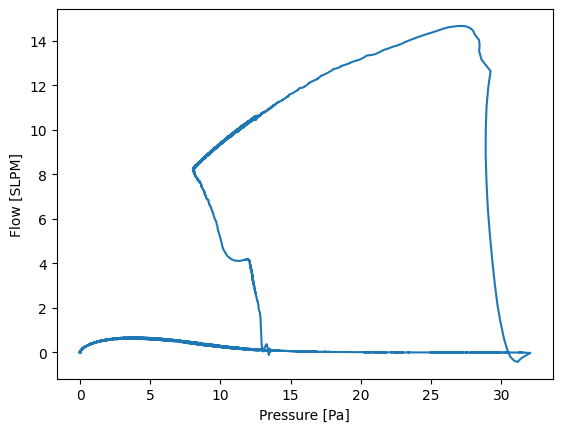

In [12]:
plt.plot(P/1000,flow)
plt.xlabel('Pressure [Pa]')
plt.ylabel('Flow [SLPM]')
#plt.xlim(5,7)
#plt.ylim(-0.25, 1)




In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create a colormap
colormap = cm.get_cmap('viridis')

# Normalize the time variable to fit the colormap scale
norm_time = (time - time.min()) / (time.max() - time.min())

# Loop through and plot each segment with corresponding color
for i in range(len(time) - 1):
    plt.plot(P[i:i+2]/1000, flow[i:i+2], color=colormap(norm_time[i]))

# Add a colorbar to represent the time variable
sm = cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=time.min(), vmax=time.max()))
sm.set_array([])
plt.colorbar(sm, label='Time')

plt.xlabel('Pressure [kPa]')
plt.ylabel('Flow [SLPM]')
plt.title('Pressure vs Flow Colored by Time')
plt.show()
#plt.xlim(5,7)
#plt.ylim(-0.25, 1)


#save_plot('Pressure_vs_flow')


C:\Users\vaarkamp\AppData\Local\Temp\ipykernel_3236\2583611361.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis')
